In [42]:
import pandas as pd
import numpy as np

In [76]:
original_data=pd.read_csv("datasets/adult.csv", names=["Age","Workclass","fnlwgt","Education","Education-Num","Marital Status",
                         "Occupation","Relationship","Race","Gender","Capital Gain","Capital Loss","Hours Per Week","Country",
                         "Target"], sep="\s*,\s*",engine="python",na_values="?")
original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours Per Week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11028\1374263217.py:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if(original_data.dtypes[column]==np.object):
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11028\1374263217.py:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if(original_data.dtypes[column]==np.object):
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11028\1374263217.py:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence t

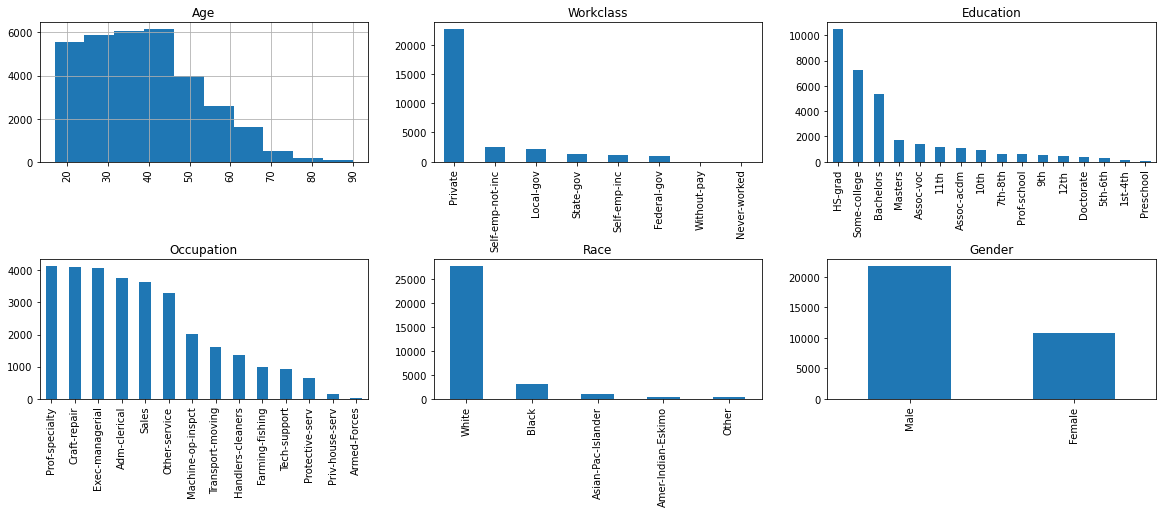

In [44]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

fig=plt.figure(figsize=(20,20))
cols=3
rows=math.ceil(float(original_data.shape[1]/cols))

for i, column in enumerate(["Age","Workclass","Education","Occupation","Race","Gender"]):
    ax=fig.add_subplot(rows,cols,i+1)
    ax.set_title(column)
    if(original_data.dtypes[column]==np.object):
        original_data[column].value_counts().plot(kind="bar",axes=ax)
    else:
        original_data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7,wspace=0.2)
plt.show()
    


In [94]:
import sklearn.preprocessing as preprocessing
le=preprocessing.LabelEncoder()
original_data['Occupation']=le.fit_transform(original_data['Occupation'].astype(str))
original_data["Race"]=le.fit_transform(original_data["Race"].astype(str))
original_data["Gender"]=le.fit_transform(original_data["Gender"].astype(str))
original_data["Marital Status"]=le.fit_transform(original_data["Marital Status"].astype(str))
original_data["Education"]=le.fit_transform(original_data["Education"].astype(str))
original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours Per Week,Country,Target
0,39,State-gov,77516,4,13,4,0,Not-in-family,4,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,4,13,4,7,Husband,4,1,0,0,13,United-States,0
2,38,Private,215646,4,9,4,9,Not-in-family,4,1,0,0,40,United-States,0
3,53,Private,234721,2,7,2,9,Husband,2,1,0,0,40,United-States,0
4,28,Private,338409,2,13,2,13,Wife,2,0,0,0,40,Cuba,0


In [95]:
original_data['Target']=le.fit_transform(original_data['Target'].astype(str))
original_data.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours Per Week,Country,Target
32556,27,Private,257302,4,12,4,3,Wife,4,0,0,0,38,United-States,0
32557,40,Private,154374,4,9,4,10,Husband,4,1,0,0,40,United-States,1
32558,58,Private,151910,4,9,4,0,Unmarried,4,0,0,0,40,United-States,0
32559,22,Private,201490,4,9,4,0,Own-child,4,1,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,4,9,4,7,Wife,4,0,15024,0,40,United-States,1


In [96]:
original_data.Target.unique()

array([0, 1])

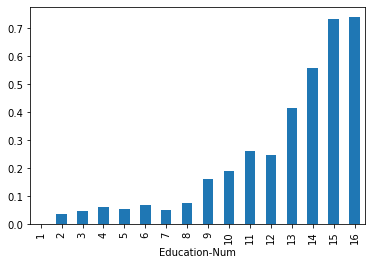

In [97]:
original_data.groupby("Education-Num").Target.mean().plot(kind="bar")
plt.show()

In [98]:
from sklearn.model_selection import train_test_split
x=original_data[["Education-Num","Occupation"]]
y=original_data["Target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [99]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(x_train,y_train)
score=classifier.score(x_test,y_test)
print(score)

0.7838169814217718


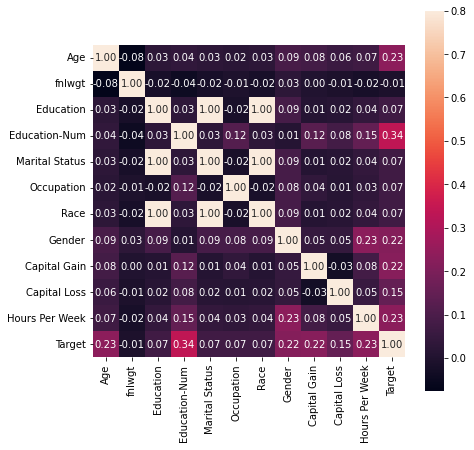

In [100]:
import seaborn as sns
corr=original_data.corr()
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corr,vmax=.8,square=True,annot=True,fmt=".2f")
plt.show()

In [102]:
x=original_data[["Education-Num","Occupation","Age","Gender"]]
y=original_data["Target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
classifier.fit(x_train,y_train)
score=classifier.score(x_test,y_test)
print(score)

0.7936434822662367


In [103]:
classifier=SVC(kernel='rbf', C=1.0)
classifier.fit(x_train,y_train)
score=classifier.score(x_test,y_test)
print(score)

0.7936434822662367


In [106]:
classifier=SVC(kernel='linear', C=1.0)
classifier.fit(x_train,y_train)
score=classifier.score(x_test,y_test)
print(score)

0.797328420082911
